# Decision Tree - SVM Classification

## Lab - Iris Flower Classification

This exercise is understanding the decision tree classifier over the IRIS data set. 

Perform the following operations:

#### 1. Plot a scatter of all feature columns. Note which of them are highly correlated. Consider those feature columns only.

#### 2. The flower column of the data is a string denoting the flower. Convert Iris-setosa, Iris-versicolor and Iris-virginica to numbers 0, 1, 2 respectively with a lambda method and apply method of pandas. 

#### 3. Split your dataset into training and testing. There should be 40 samples of each flower in the training dataset, and 10 of each in the testing dataset. Apply a decision tree classifier over the training dataset, with entropy gain.

#### 4. Find the following for depth of the tree varying from 2 to 4:
- The decision tree, Confusion Matrix.  
- What do you observe as your depth increases? Compare the decision tree & accuracy of each model using confusion matrix.

#### 5. Plot a contourf plot with 2 features to visualize the flower classification.

#### 6. Obtain the training and testing split with the train_test_split function with 80:20 split and random state 9032. Obtain the decision tree with depth 3. How does this model fare with the previous model? Give answers.

### Apply suitable SVM algorithm and check the model. How does this model fare with the previous Decision Tree model?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('./data/iris_data.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['flower'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: flower, dtype: int64

In [5]:
df.shape

(150, 5)

In [6]:
df['flower'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower'], dtype='object')

## 1. Plot a scatter of all feature columns. Note which of them are highly correlated. Consider those feature columns only.

In [8]:
setosa = df[df['flower']== 'Iris-setosa']
versicolor = df[df['flower']== 'Iris-versicolor']
virginica = df[df['flower']== 'Iris-virginica']


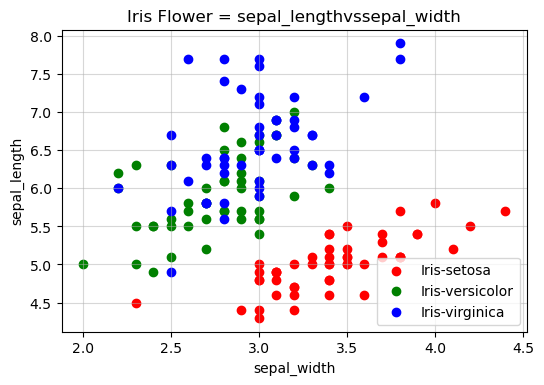

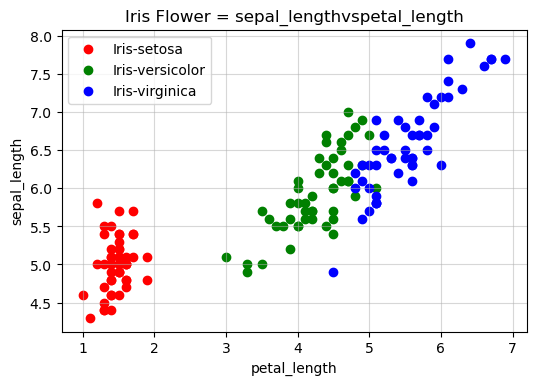

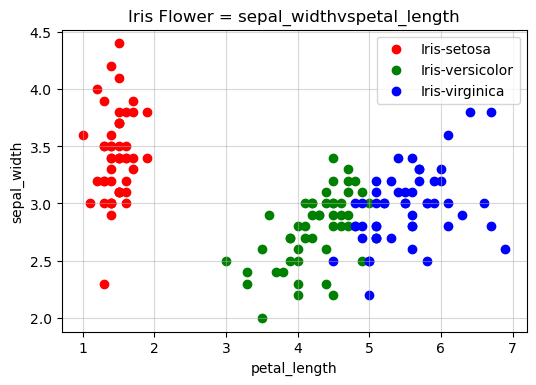

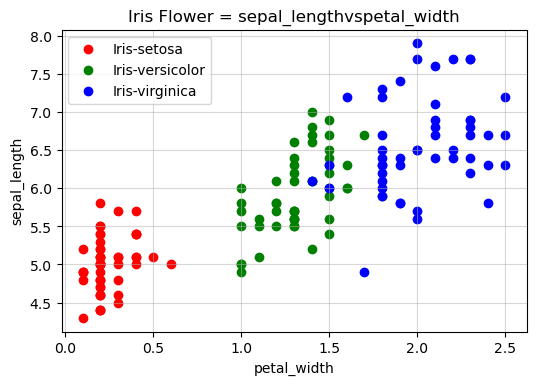

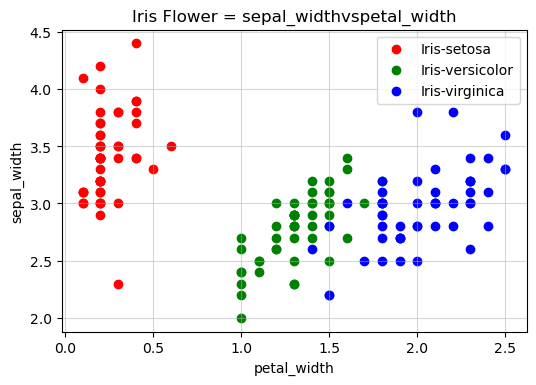

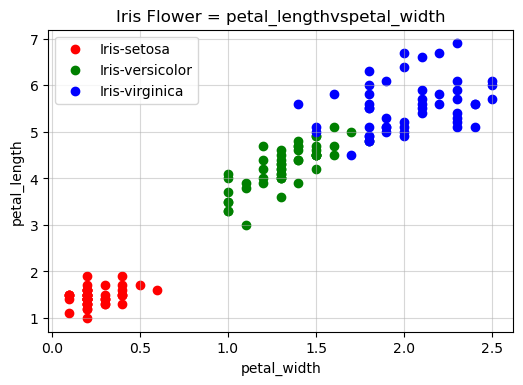

In [9]:
for i in range(4):
    for j in range(i):
        plt.figure(dpi=100)
        plt.scatter(setosa[df.columns[i]],setosa[df.columns[j]],color ='r',label = 'Iris-setosa')
        plt.scatter(versicolor[df.columns[i]],versicolor[df.columns[j]],color ='g',label = 'Iris-versicolor')
        plt.scatter(virginica[df.columns[i]],virginica[df.columns[j]],color ='b',label = 'Iris-virginica')
        
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.title("Iris Flower = "+df.columns[j] +"vs"+df.columns[i])
        plt.legend()
        plt.grid(alpha=0.5)
        plt.show()

In [10]:
flower = list(df['flower'].unique())
print(flower)
num = range(len(flower))
print(num)
mapping = dict(zip(flower,num))
print(mapping)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
range(0, 3)
{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [11]:
df['n_flower'] = df['flower'].apply(lambda x : mapping[x])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower,n_flower
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [12]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,n_flower
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
n_flower,0.782561,-0.419446,0.949043,0.956464,1.000000


## 2. The flower column of the data is a string denoting the flower. Convert Iris-setosa, Iris-versicolor and Iris-virginica to numbers 0, 1, 2 respectively with a lambda method and apply method of pandas.

- it's already done above

## 3. Split your dataset into training and testing. There should be 40 samples of each flower in the training dataset, and 10 of each in the testing dataset. Apply a decision tree classifier over the training dataset, with entropy gain.

In [13]:
df = df[['petal_length','petal_width','n_flower']]
df.head()

,petal_length,petal_width,n_flower
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [14]:
setosa = df[df['n_flower']==0]
versicolor = df[df['n_flower']==1]
virginica= df[df['n_flower']==2]


In [15]:
from sklearn.model_selection import train_test_split

setosa_xtrain,setosa_xtest,setosa_ytrain,setosa_ytest = train_test_split(setosa[['petal_length','petal_width']],setosa['n_flower'],test_size=0.2)
versicolor_xtrain,versicolor_xtest,versicolor_ytrain,versicolor_ytest = train_test_split(versicolor[['petal_length','petal_width']],versicolor['n_flower'],test_size=0.2)
virginica_xtrain,virginica_xtest,virginica_ytrain,virginica_ytest = train_test_split(virginica[['petal_length','petal_width']],virginica['n_flower'],test_size=0.2)

In [16]:
x_train = pd.concat([setosa_xtrain,versicolor_xtrain,virginica_xtrain])
x_test = pd.concat([setosa_xtest,versicolor_xtest,virginica_xtest])
y_train = pd.concat([setosa_ytrain,versicolor_ytrain,virginica_ytrain])
y_test = pd.concat([setosa_ytest,versicolor_ytest,virginica_ytest])

In [17]:
decisiontree = DecisionTreeClassifier(criterion='entropy',max_depth=1)

model = decisiontree.fit(x_train,y_train)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, SVC_model.predict(x_test))

array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 10]], dtype=int64)

In [19]:
model.classes_

array([0, 1, 2], dtype=int64)

<AxesSubplot:>

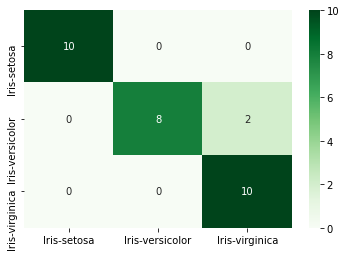

In [32]:
import seaborn as sb
sb.heatmap(confusion_matrix(y_test,SVC_model.predict(x_test)),annot=True,cmap='Greens',xticklabels=flower,yticklabels=flower)

## 4. Find the following for depth of the tree varying from 2 to 4:
- The decision tree, Confusion Matrix.
- What do you observe as your depth increases?
- Compare the decision tree & accuracy of each model using confusion matrix.

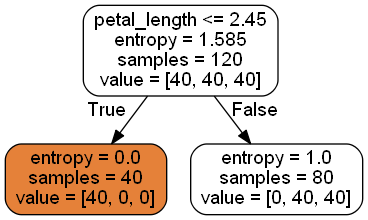

In [37]:
# only for windows
import os
os.environ['PATH'] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

DecisionTreeImg = StringIO()

export_graphviz(model,out_file  = DecisionTreeImg,
               filled=True,rounded = True, 
                feature_names = ['petal_length','petal_width'])

graph = pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

## 5.  Plot a contourf plot with 2 features to visualize the flower classification.

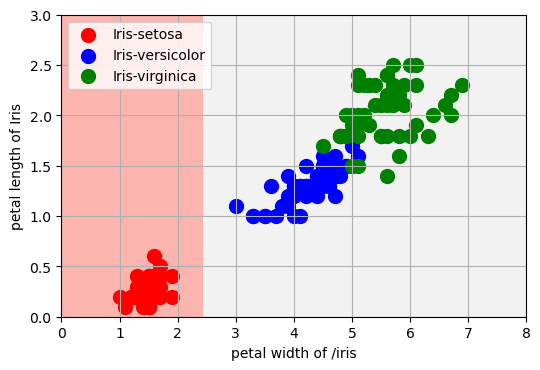

In [41]:
%matplotlib inline
import numpy as np

x_min, x_max = 0,8 # sleepy range
y_min, y_max = 0,3 #grumpy range

xx, yy = np.meshgrid(np.arange(x_min,x_max,0.01),
                    np.arange(y_min,y_max,0.01))

#print(xx) ; print(yy); # x coord and y coord
xx_lin = xx.ravel() #print(xx_lin);
yy_lin = yy.ravel() #print(yy_lin);

pred_input = np.c_[xx_lin,yy_lin]
#print(pred_input)

Z= model.predict(pred_input) #print(z)
Z= Z.reshape(xx.shape)
plt.figure(dpi=100)

#countour plot requires 2 dimen matrix
plt.contourf(xx,yy,Z,cmap=plt.cm.Pastel1)
plt.scatter(setosa['petal_length'],setosa['petal_width'],color = 'r',s=100,label = 'Iris-setosa')
plt.scatter(versicolor['petal_length'],versicolor['petal_width'],color = 'b',s=100,label = 'Iris-versicolor')
plt.scatter(virginica['petal_length'],virginica['petal_width'],color = 'g',s=100,label = 'Iris-virginica')

plt.xlabel("petal width of /iris")
plt.ylabel("petal length of Iris")
plt.legend()
plt.axis([0,8,0,3])
plt.grid()


# svm model

In [24]:
from sklearn.svm import SVC

SVC_classifier = SVC(C=10,kernel = 'rbf',degree = 3)

SVC_model = SVC_classifier.fit(x_train,y_train)

In [25]:
confusion_matrix(y_test, SVC_model.predict(x_test))

array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 10]], dtype=int64)

In [ ]:
SVC_Z =

## 6. Obtain the training and testing split with the train_test_split function with 80:20 split and random state 9032. Obtain the decision tree with depth 3. How does this model fare with the previous model? Give answers.¶

## 7. Apply suitable SVM algorithm and check the model. How does this model fare with the previous Decision Tree model?